In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import tree, svm, linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
from sklearn.svm import SVC
from sklearn.metrics import plot_roc_curve
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from imblearn.metrics import sensitivity_specificity_support
df=pd.read_csv('CHI.csv')

In [3]:
X= df[[
'S4HIMATH_I',
'S4UNEMPCOMP_I',
'X2WHITE',
'X3HSCOMPSTAT',
'X4EVRTRANSHS',
'X4HSCOMPSTAT',
'X2RACE',
'X2SEX',
'X4EVERDROP',
'X3TGPAWGT',
'X3TGPATOT',
'X3TCREDTOT',
'X3TCREDACAD',
'X3TCREDMTSC',
'X3TGPAACAD',
'X3TGPASTEM',
'X3TGPASOCST',
'X3DROPOUTTIME',
'X3CONTROL',
'A2SUMRSCH',
'S4EVERWRYMNY',
    'X1FAMINCOME',
    'X2PAREDU',
    'X3TGPAMAT',
    'X3T1CREDPREC',
    'X3TCREDREM',
    'X2REQLEVEL'
]] 

y=df[['X4EVRAPPCLG']]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [5]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

rfc = RandomForestClassifier(random_state=101)
rfecv = RFECV(estimator=rfc, step=1, cv=StratifiedKFold(10), scoring='accuracy')
rfecv.fit(X, y)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
      estimator=RandomForestClassifier(random_state=101), scoring='accuracy')

In [6]:
print('Optimal number of features: {}'.format(rfecv.n_features_))

Optimal number of features: 27


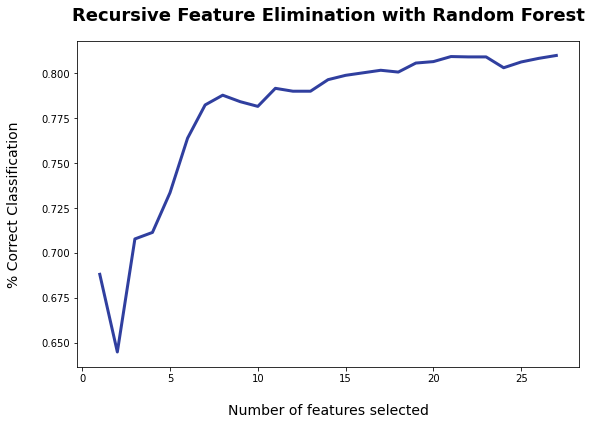

In [7]:
plt.figure(figsize=(9, 6))
plt.title('Recursive Feature Elimination with Random Forest', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#303F9F', linewidth=3)

plt.show()

In [8]:
print(np.where(rfecv.support_ == False)[0])

X.drop(X.columns[np.where(rfecv.support_ == False)[0]], axis=1, inplace=True)

[]


In [9]:
rfecv.estimator_.feature_importances_

array([0.00059681, 0.09537279, 0.011326  , 0.02391541, 0.01403316,
       0.06380277, 0.02854066, 0.0146337 , 0.08557827, 0.0480316 ,
       0.05498158, 0.06564734, 0.07664752, 0.05171066, 0.04070117,
       0.03175789, 0.03514269, 0.00673207, 0.00826767, 0.01114147,
       0.02252645, 0.04164345, 0.03912588, 0.0319713 , 0.01211313,
       0.02299423, 0.06106433])

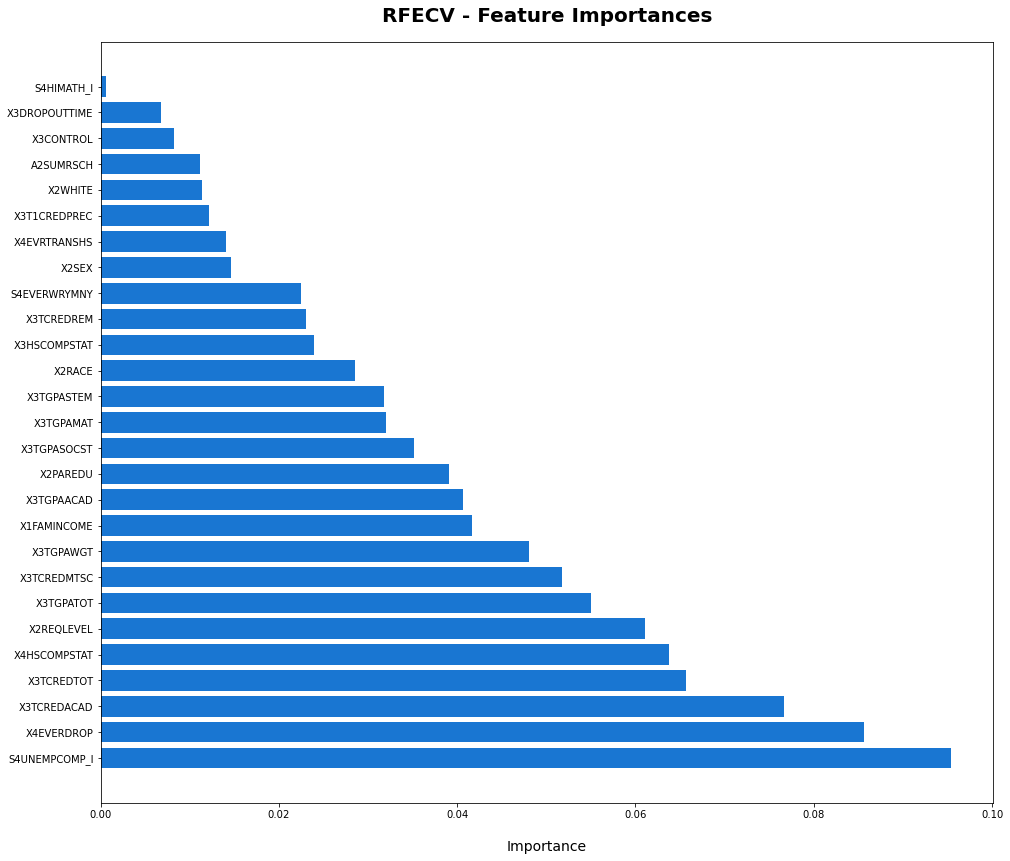

In [10]:
dset = pd.DataFrame()
dset['attr'] = X.columns
dset['importance'] = rfecv.estimator_.feature_importances_

dset = dset.sort_values(by='importance', ascending=False)


plt.figure(figsize=(16, 14))
plt.barh(y=dset['attr'], width=dset['importance'], color='#1976D2')
plt.title('RFECV - Feature Importances', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()

In [12]:
dset['importance']

1     0.095373
8     0.085578
12    0.076648
11    0.065647
5     0.063803
26    0.061064
10    0.054982
13    0.051711
9     0.048032
21    0.041643
14    0.040701
22    0.039126
16    0.035143
23    0.031971
15    0.031758
6     0.028541
3     0.023915
25    0.022994
20    0.022526
7     0.014634
4     0.014033
24    0.012113
2     0.011326
19    0.011141
18    0.008268
17    0.006732
0     0.000597
Name: importance, dtype: float64